In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so
import scipy.stats as ss
import seaborn as sns

## Linear Regression

Linear regression is used to predict a variable, based on the value another variable. 

We can predict the value or y based on the value of x.  One of its main advantages is the ease of interpreting results and predicting results. 

This is done by finding the best values for m and c that minimize the difference between the observed values of the dependent variable and the predicted values given by the line created by the linear regression function. This is usually done using a method called the least squares method.
The simple linear regression formula is $y = mx +c$, where:

**y** is the dependent variable as its value influenced by the values of the other variables.

**x** is the independent variable.

**m** is the slope of the line.

And **c** is called the y intercept as it represents the value of y when x=0.



### Importing, preparing and exploring the data 

We are going to use the Human height and weight [dataset](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights#SOCR_Data_-_25.2C000_Records_of_Human_Heights_.28in.29_and_Weights_.28lbs.29) dataset by UCLA


The dataset contains 25.000 entries of height and weights. We are going to use 200 samples of those individuals weight and height. The weight values are in pounds and the height values are in inches.
Below we can see a snapshot of the data:


In [23]:
# Creating a Dataframe
df = pd.read_csv("weight-height-200.csv")
df.head()

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30


In [24]:
df.describe()

,Height(Inches),Weight(Pounds)
count,200.000000,200.000000
mean,67.949800,127.221950
std,1.940363,11.960959
min,63.430000,97.900000
25%,66.522500,119.895000
50%,67.935000,127.875000
75%,69.202500,136.097500
max,73.900000,158.960000


In [25]:
# Checking if there is missing data
df.isnull().sum()

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [26]:
# Allocating the height to x and the weight to y.
x = df['Height(Inches)']
y = df['Weight(Pounds)']


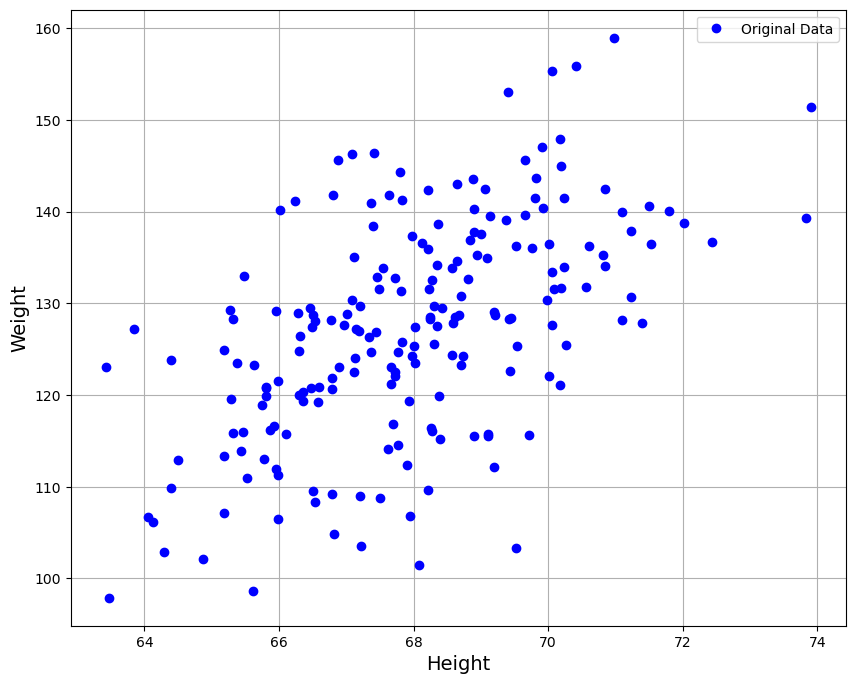

In [27]:
# Plotting the original data
plt.rcParams['figure.figsize'] = (10, 8)
plt.plot(x,y,"bo", label=r"Original Data")
plt.xlabel("Height", size="14")
plt.ylabel("Weight", size="14")
plt.grid()
plt.legend()
plt.show()


<Axes: title={'center': 'Weight'}, xlabel='Weight(Pounds)', ylabel='Count'>

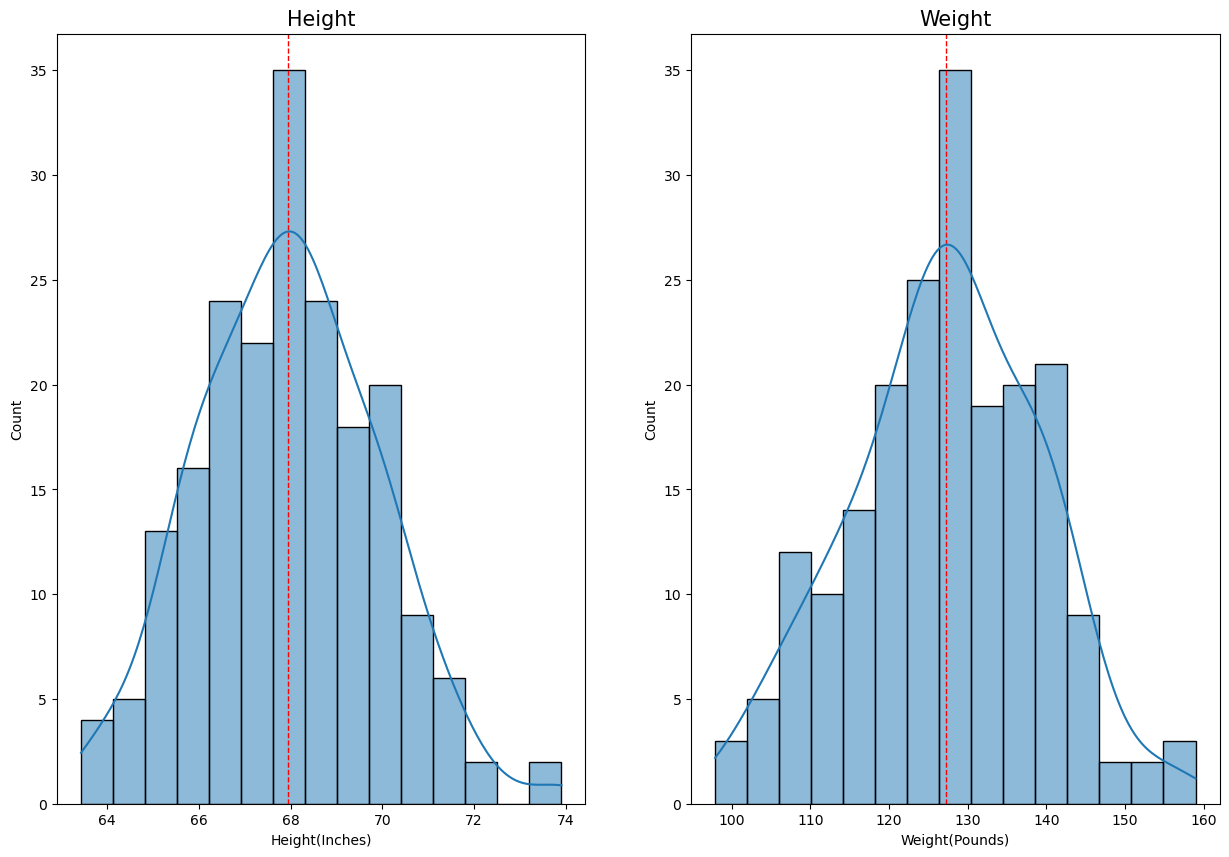

In [28]:
# Plotting the data on a histogram plot to show that the follows a normal distribution.

fig, axs = plt.subplots(figsize=(15, 10), ncols=2)

# Height
axs[0].axvline(x.mean(), color='r', linestyle='dashed', linewidth=1)
axs[0].set_title('Height', size=15)
sns.histplot(kde=True, data=x, ax=axs[0], bins = 15)

# Weight
axs[1].axvline(y.mean(), color='r', linestyle='dashed', linewidth=1)
axs[1].set_title('Weight', size=15)
sns.histplot(kde=True, data=y, ax=axs[1], bins = 15)


### Simple Linear Regression using least Square method


The least square method works by calculating the difference between the y value from our data and the y value from our predicted data, this value is called residual. 

In our case, the predicted y value will be the value for the function $y = 2x +4$ since we are assuming m=2 and c=4.
Then we calculate the residual value for each point of data, square them and add them all together, this will give us the squared residual value for this function or in other words its cost.


The mathematical cost function can be seen below:

$$ Cost(m, c) = \sum_i (y_i - mx_i - c)^2 $$


Since using all our data to show that in a plot format will cause the plot to become difficult to read we have sliced the data in 20 datapoints and plotted them.

As we can see below the doted lines represent the residual value, the distance between our predicted line and our actual data.


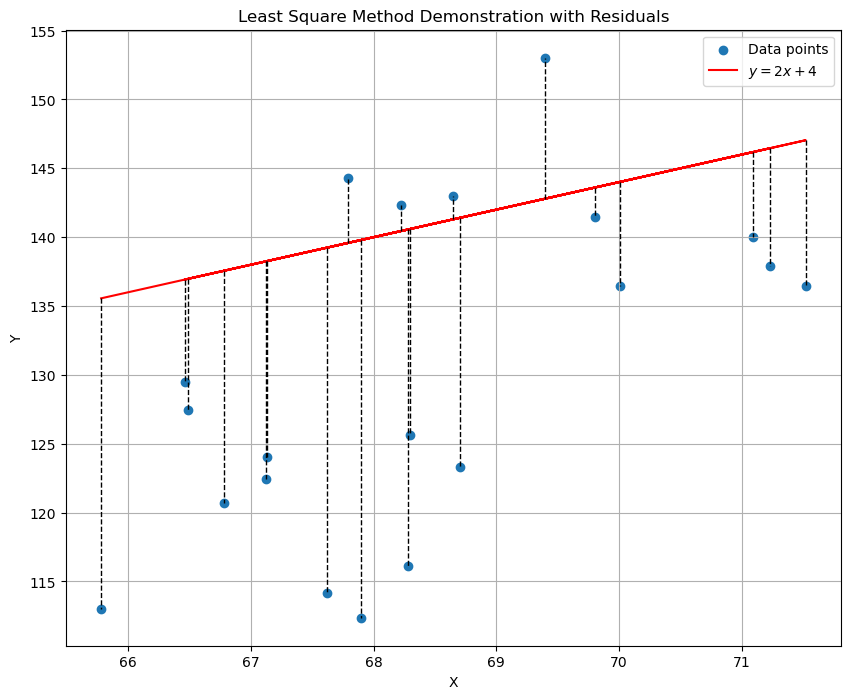

The residual value for this function is 4342.981400.


In [29]:
#Slicing down the data to make a easier to see plot.
x_sample = df['Height(Inches)'][0:20]
y_sample = df['Weight(Pounds)'][0:20]

#Creating a array of the same size with the mean of y
#y_sample_mean = np.full_like(y_sample, y_sample.mean())


# Calculate the residuals
# m= 2.0 and c =4.0
residuals = y_sample - (2 * x_sample + 4)

# Create the plot
#Plot with the original datapoints
plt.scatter(x_sample, y_sample, label='Data points')
#Line plot
plt.plot(x_sample, (2 * x_sample + 4), 'r', label='$y = 2x +4$')

 #Plot checked lines showing residuals
for x_sample_i, y_sample_i, res in zip(x_sample, y_sample, residuals):
    plt.plot([x_sample_i, x_sample_i], [(2 * x_sample_i + 4), y_sample_i], 'k--', linewidth=1)
   
    
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Least Square Method Demonstration with Residuals')
plt.legend()
plt.grid(True)
plt.show()

#Calcaulating the residual value
residual = sum(residuals**2)
print("The residual value for this function is %6.6f." % (residual))


But this does not show us if this line is the best fine line for this data or not. To find that there are several methods that we can use including the Scipy package from Python.

## Scipy Minimize

Since the best fit line using the least square method is the one that has the lowest costs function We can use the scipy.optimize.minimize to find this value.
We start by setting a guess for our m and c values, in our case we are going to use the same values used for the function above, m = 2.0 and c = 4.0


We also need a function to be minimized, so we are going to write down the cost function in code as below:

In [30]:
# Representation of the Cost function
def cost(MC):
    m,c = MC
    cost = np.sum((y - m * x - c)**2)
    return cost

Now we just need to run the minimize function and get the results.

In [31]:
result = so.minimize(cost, (2.0,4.0))
m = result.x[0]
c = result.x[1]
print("m is equal to %8.6f and c is equal to %6.6f." % (m, c))

m is equal to 3.432671 and c is equal to -106.027342.


As we can see above, we have the minimize results for m and c.

And below we have a plot showing the best fit line using out minimize calculation in comparison with our guess line.


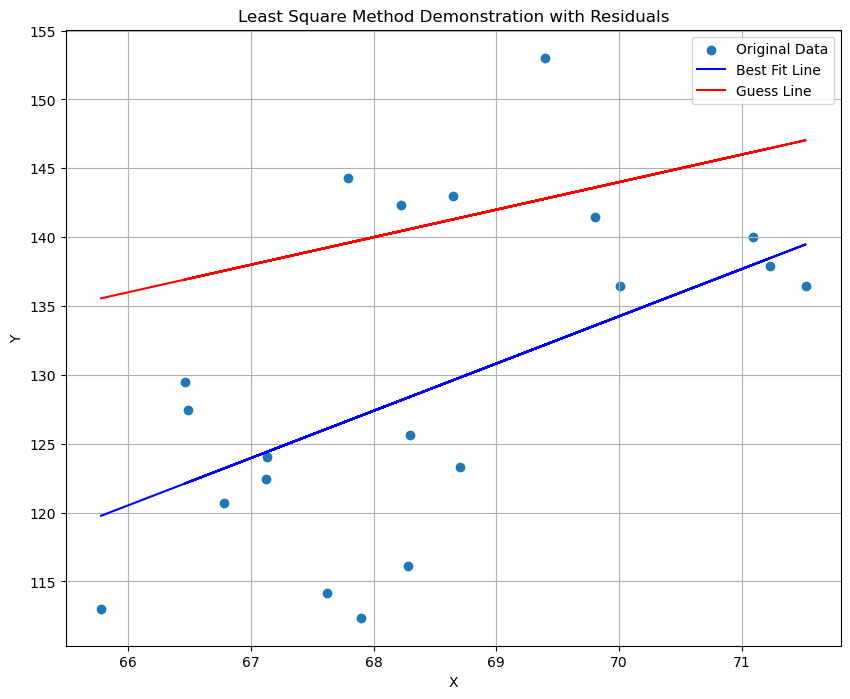

The residual value for the best fit function is 1901.900869.
The residual value for the guess function is 4342.981400.


In [32]:

#Slicing down the data to make a easier to see plot.
x_sample = df['Height(Inches)'][0:20]
y_sample = df['Weight(Pounds)'][0:20]

#Creating a array of the same size with the mean of y



# Calculate the residuals
m = 3.432671  
c =(-106.027342)
best_fit_residuals = y_sample - (m * x_sample + c)
guess_residuals = y_sample - (2 * x_sample + 4)

# Create the plot
#Plot with the original datapoints
plt.scatter(x_sample, y_sample, label='Original Data')
#Line plot
plt.plot(x_sample, (m * x_sample + c), 'b', label='Best Fit Line')
plt.plot(x_sample, (2 * x_sample + 4), 'r', label='Guess Line')

   


plt.xlabel('X')
plt.ylabel('Y')
plt.title('Least Square Method Demonstration with Residuals')
plt.legend()
plt.grid(True)
plt.show()

#Calcaulating the residual value
best_residual = sum(best_fit_residuals**2)
guess_residual = sum(guess_residuals**2)
print("The residual value for the best fit function is %6.6f." % (best_residual))
print("The residual value for the guess function is %6.6f." % (guess_residual))

We can also use a mathematical approach to find the best values for m and c.

## Mathematical Approach

Below there is the mathematical formula that can be used to calculate the values of **m** and **c**. Where $\bar{x}$ is the mean of $x$ and $\bar{y}$ is the mean of $y$.

$$ m = \frac{\sum_i (x_i - \bar{x}) (y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2} \qquad$$



We can write the formula above can be written as code. First we will calculate the means for x and y.  After that, we need to subtract the means of x and y from each individual x and y value, shown in the mathematical formula as $x_i$ and $y_i$.

In [33]:
# Mean from x and y
x_mean = np.mean(x)
y_mean = np.mean(y)

# Subtracting the means from x and y
x_minus_mean = x - x_mean
y_minus_mean = y - y_mean

After that we multiply each value of x minus the mean of x $(x_i - \bar{x})$ by each value of y minus the mean of y $(y_i - \bar{y})$ and sum each one of the resulting values together. And divide this value by the sum of the square difference of each value of x minus the mean of x $(x_i - \bar{x})^2$.
The final result will be our best fit m value.

In [34]:

# The best m is found by the following calculation.
m = np.sum(x_minus_mean * y_minus_mean) / np.sum(x_minus_mean * x_minus_mean)
print("m is equal to %8.6f." % (m))

m is equal to 3.432676.


The value of $c$ is found by getting the mean of $y$ minus the value of m multiplied by the mean value of $x$.

$$c = \bar{y} - m \bar{x} $$

In [35]:
# Using m to calculate the best value for c.
c = y_mean - m * x_mean

print("c is equal to %6.6f." % (c))

c is equal to -106.027706.


As we can see above, we got the same results for the best **m** and **c**.

Another way to find the best values for m and c, is the  [numpy.polyfit]( https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) function.

### Using Numpy

The numpy.polyfit function takes the value of x and y as well as the degree of the polynomial and return the values of m and c. In our case with the linear regression the degree of the polynomial is 1. Since the linear regression formula is $y = mx +c$ and the degree of a polynomial is defined by the [power of the variable part]( https://youtu.be/ffLLmV4mZwU?t=372).

In [36]:
np.polyfit(x, y,1)

array([   3.43267613, -106.02770645])

Again the results are the same, showing the best value for **m** and **c** as 3.43267613 and -106.02770645 respectively. 

## Scipy Linregress

The [scipy.stats.linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html), takes as mandatory arguments **x** and **y** from our guess function and uses it to calculate the best values for **m** and **c**. It also returns the r_value, p_value and the standard error. 

In [16]:
# use the scipy function for linear distribuition and explain how it works and what parameters it takes

In [17]:
m, c, r_value, p_value, stder = ss.linregress(x,y)

In [18]:
print("m is equal to %8.6f and c is equal to %6.6f." % (m, c))

m is equal to 3.432676 and c is equal to -106.027706.


In [21]:
print(r_value, p_value)

0.5568647346122992 1.1029015151266264e-17


## Predicting the data

Now that we have the best values for m and c. We can use our new values and data to predict the weight of a person based on their height.

In [20]:
#Predicting the weight of a person using our best fit function.
person_height = 70
predicted_weight = m* person_height +c
print("The person predicted weight based on their height is %8.2f pounds" %(predicted_weight))

The person predicted weight based on their height is   134.26 pounds


## Conclusion

## Plot for the best fit line

In [23]:
best_fit_line = (m * x)+ c

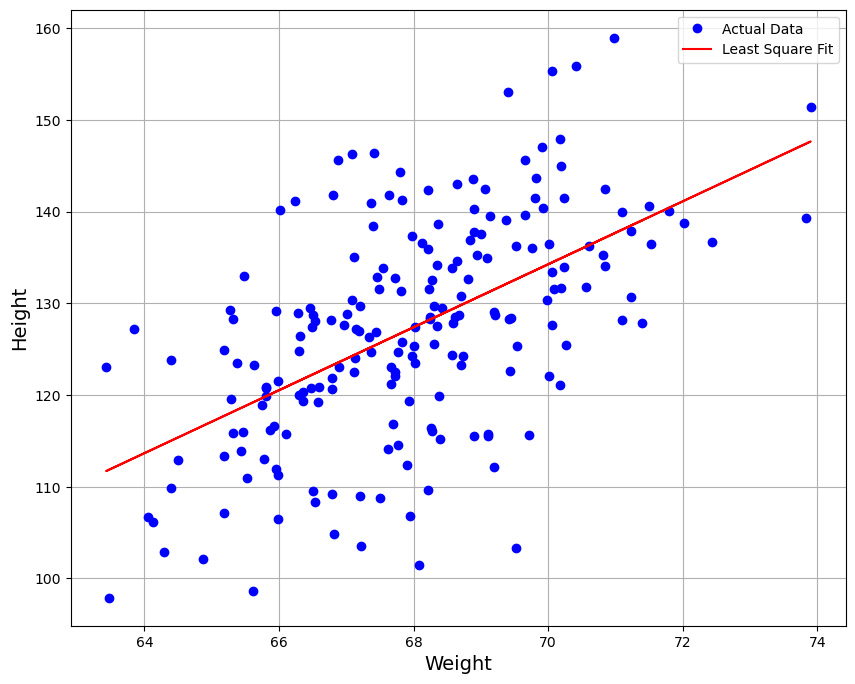

In [24]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.plot(x,y,"bo", label=r"Actual Data")
plt.xlabel("Weight", size="14")
plt.ylabel("Height", size="14")
plt.grid()

#Setting the limit of the plot so the last value of Y and X is the end of the plot

#Plotting different lines to to try to find the best one

plt.plot(x,best_fit_line,"r-", label=r"Least Square Fit")


plt.legend()

plt.show()

